In [3]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# constants
lambda_laser = 532e-9 # wavelength of the laser in meters

d_sugar= 1e-2 # thickness in meters
d_cuvett = 1.25e-2 - d_sugar # thickness in meters

n_cuvett = 1.59 # refractive index of the cuvett
n_air = 1.0 # refractive index of air

#functions
def N_fit_suiker(theta_in,n_sugar):
    """Function to fit the refractive index data."""
    theta_in_rad = np.deg2rad(theta_in)
    return 2/lambda_laser*(2*d_cuvett*(np.sqrt(n_cuvett**2 -n_air**2*np.sin(theta_in_rad)**2)-n_air*np.cos(theta_in_rad)) + d_sugar*(np.sqrt(n_sugar**2 -n_air**2*np.sin(theta_in_rad)**2)-n_air*np.cos(theta_in_rad))-(2*n_cuvett*d_cuvett + n_sugar*d_sugar - 2*d_cuvett*n_air-d_sugar*n_air))

In [47]:
fringes_0 = 0
fringes_02 = fringes_0 + 16
fringes_24 = fringes_02 + 24
fringes_46 = fringes_24 + 47
fringes_68 = fringes_46 + 54
fringes_810 = fringes_68 + 60
fringes = np.array([fringes_0,fringes_02,fringes_24,fringes_46,fringes_68,fringes_810])
theta_graden = np.array([0,2,4,6,8,10])

In [48]:
fringes = np.array([fringes_0,fringes_02,fringes_24,fringes_46,fringes_68])
theta_graden = np.array([0,2,4,6,8])

In [ ]:
fringes = np.array([fringes_0,fringes_02,fringes_24,fringes_46,])
theta_graden = np.array([0,2,4,6])

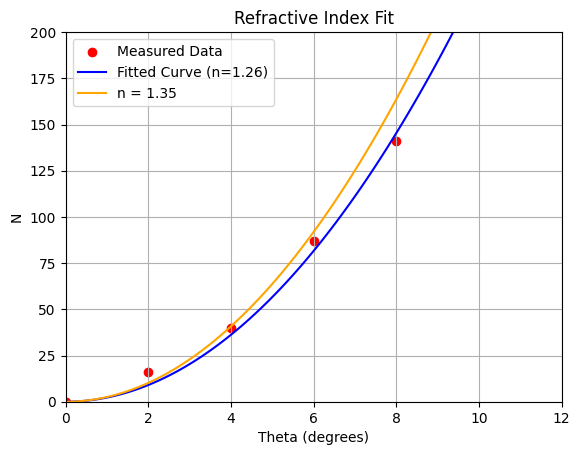

In [49]:
# fit the data
popt, pcov = curve_fit(N_fit_suiker, theta_graden, fringes , p0=[1.3])
n_fit = popt
theta_fit = np.linspace(0,12,100)
n_line = N_fit_suiker(theta_fit, *n_fit)

# plotting
plt.figure(0)
plt.scatter(theta_graden, fringes, label='Measured Data', color='red')
plt.plot(theta_fit, n_line, label=f'Fitted Curve (n={n_fit[0]:.2f})', color='blue')
plt.plot(theta_fit,N_fit_suiker(theta_fit,1.35),label='n = 1.35',color='orange')
plt.xlabel('Theta (degrees)')
plt.ylabel('N')
plt.title('Refractive Index Fit')
plt.xlim(0,12)
plt.ylim(0,200)          
plt.legend()
plt.grid()